In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [363]:
import os
path=os.getcwd()+ '\data\Chennai_house_univariate_train.csv'   #get current working directory for data size values
raw_data=pd.read_csv(path)
raw_data.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


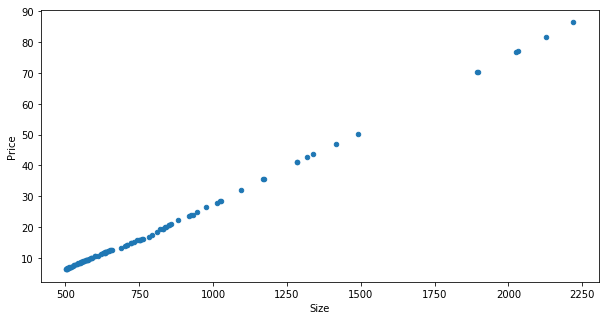

In [364]:
raw_data.plot(kind='scatter',x='Size',y='Price',figsize=(10,5))   #scatter defines type of plot-could use line,bar etc
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())   #gives scattered plot of data in a linear arranged form after arranging features by scaling
data.head()

In [365]:
data.shape  #gives no. of rows and columns of data matrix in csv path file 

(97, 2)

In [366]:
data.insert(0,'Ones',1)   #in first column,we insert x0=1 for being able to get transposing matrix theta
data.head()

,Ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [367]:
cols=data.shape[1]   #gives no. of columns
print(cols)

3


In [368]:
x=data.iloc[:,0:cols-1]       #ones and size column
y=data.iloc[:,cols-1:cols]    #gives last column ie price
#iloc is used for indexing in pandas

In [369]:
x=np.matrix(x)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))

In [370]:
x.shape,theta.shape,y.shape   #tells no. of rows and columns

((97, 2), (1, 2), (97, 1))

In [371]:
def Compute_Error(x,y,theta):
    inner=np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))
Compute_Error(x,y,theta)

0.024346853685025278

In [372]:
learn_rate=1
iters=150
def gradientDescent(x,y,theta,learn_rate,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])   #theta.ravel makes it a 1D array, not needed necessarily here
    cost=np.zeros(iters)
    for i in range(iters):
        error= (x*theta.T)-y
        for j in range(parameters):
            term=np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((learn_rate/len(x))*np.sum(term))
        theta=temp
        cost[i]=Compute_Error(x,y,theta)
    return theta,cost

In [373]:
theta,cost=gradientDescent(x,y,theta,learn_rate,iters)
print (theta,cost)

[[-1.02116196e-16  9.82955251e-01]] [2.19673183e-02 1.98208708e-02 1.78846789e-02 1.61381471e-02
 1.45626971e-02 1.31415706e-02 1.18596508e-02 1.07033016e-02
 9.66022291e-03 8.71931915e-03 7.87058178e-03 7.10498263e-03
 6.41437789e-03 5.79142147e-03 5.22948685e-03 4.72259664e-03
 4.26535895e-03 3.85291006e-03 3.48086268e-03 3.14525926e-03
 2.84252994e-03 2.56945453e-03 2.32312827e-03 2.10093094e-03
 1.90049899e-03 1.71970039e-03 1.55661194e-03 1.40949886e-03
 1.27679627e-03 1.15709258e-03 1.04911449e-03 9.51713408e-04
 8.63853270e-04 7.84599488e-04 7.13109024e-04 6.48621422e-04
 5.90450714e-04 5.37978129e-04 4.90645505e-04 4.47949357e-04
 4.09435518e-04 3.74694309e-04 3.43356182e-04 3.15087786e-04
 2.89588427e-04 2.66586861e-04 2.45838419e-04 2.27122393e-04
 2.10239700e-04 1.95010753e-04 1.81273561e-04 1.68881998e-04
 1.57704253e-04 1.47621426e-04 1.38526264e-04 1.30322020e-04
 1.22921424e-04 1.16245755e-04 1.10224003e-04 1.04792112e-04
 9.98923035e-05 9.54724563e-05 9.14855561e-05 8.7

In [374]:
Compute_Error(x,y,theta)


5.477586076298728e-05

In [375]:
X= data.Size

In [376]:
model_price=x*theta.T

Text(0.5, 1.0, 'Predicted Price vs Size')

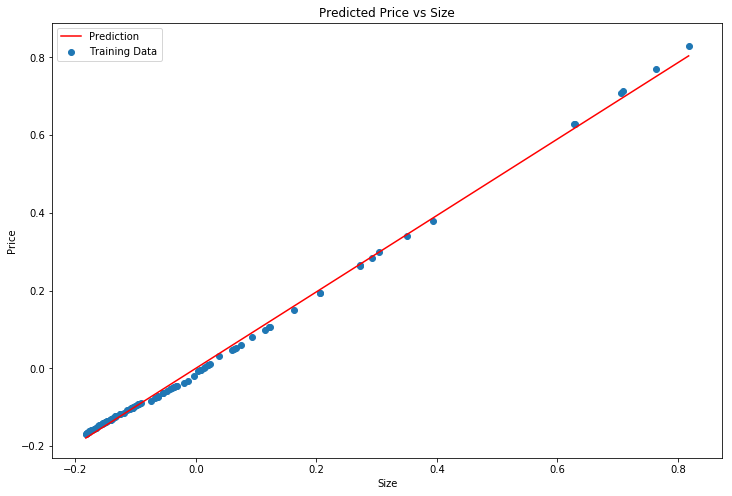

In [377]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(X,model_price,'r',label='Prediction')
ax.scatter(data.Size,data.Price,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs Size')

Text(0.5, 1.0, 'Error vs Iterations')

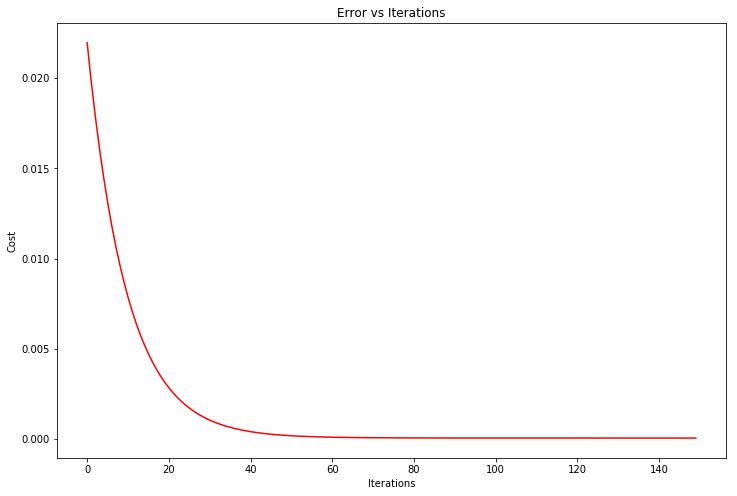

In [378]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')

In [379]:
import math
#mean absolute percetage error
erro_r=[np.power((b-a),2) for (a,b) in zip(model_price,y)]
error0=np.sum(erro_r)
error1=math.sqrt(error0)
error=(error1/len(y))*100
print("error %={}".format(error))
accuracy=100-error
print("accuracy %={}".format(accuracy))

error %=0.10627319469129685
accuracy %=99.8937268053087


In [381]:
def predict (new_theta,accuracy):
    size=float(input("Enter the size of the house in sq ft:"))
    #Mean normalisation
    size=(size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
    #model
    price=(new_theta[0,0]+(theta[0,1]*size))
    #reverse mean normalization ie scaling features back
    Predicted_Price=(price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
    Price_at_Max_Accuracy=(Predicted_Price*(1/accuracy)*100)
    Price_range=Price_at_Max_Accuracy-Predicted_Price
    return Predicted_Price,Price_range
Predicted_Price,Price_range=predict(theta,accuracy)
print('Your house cost is '+str(Predicted_Price)+' Lakhs '+' ( + or - ) '+str(Price_range)+' Lakhs')
    

Enter the size of the house in sq ft:507
Your house cost is 5.744698993005374 Lakhs  ( + or - ) 0.006111570106063446 Lakhs
